In [1]:
import pandas as pd 

#데이터 불러오기
fish= pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
#어떤 종류의 생선이 있는지 Species의 고유값을 추출 
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
#fish의 컬럼 print
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

데이터 프레임에서 Species 열을 타깃으로 만들고 나머지 5개의 열은 입력 데이터로 사용하려함

In [4]:
#데이터프레임에서 원하는 열을 리스트로 나열
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [5]:
#fish_input에 5개의 특성이 잘 저장되었는지 처음 5개의 행을 출력해보기

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


fish 데이터 프레임을 출력한 값과 비교하였고, 입력데이터가 잘 준비되었는지 확인한 후 동일한 방식으로 타깃 데이터를 만들어보기 

In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [9]:
#사이킷런 StandardScaler 클래스를 사용해 훈련세트와 테스트 세트를 표준화 전처리함 
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#k-최근접 이웃 분류기의 확률 예측 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier 클래스 객체를 만들고 최근접 이웃 개수인 k를 3으로 지정
kn = KNeighborsClassifier(n_neighbors=3)
#훈련세트로 모델을 훈련 
kn.fit(train_scaled, train_target)
#훈련세트와 테스트 세트의 점수를 확인
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


KNeighborsClassifier에서 정렬된 타깃값은 classes_속성에 저장되어 있음

In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


'Bream'이 첫 번째 클래스, 'Parkki'가 두 번째 클래스가 되는 식으로 predict()메서드는 타깃값으로 예측을 출력함

테스트 세트에 있는 처음 5개의 샘플의 타깃값을 예측해보자 

In [12]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
#decimals는 소수점 네 번째 자리까지 표기, 다섯 번째 자리에서 반올림한다 
print(np.round(proba, decimals=4)) 

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


[0. 0. 0.6667 0. 0.3333 0. 0. ] 
[]은 네번째 샘플이고, 
0. 은 첫 번째 클래스(Bream)에 대한 확률
두번째 0. 은 두 번째 클래스(Parkki)에 대한 확률을 말한다 

In [14]:
#이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 
#네 번째 샘플의 최근접 이웃 클래스를 확인 

distance, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개 이고 세 번째 클래스인 'Perch'가 2개이므로 
다섯 번째 클래스에 대한 확률은 1/3= 0.3333이고 세 번째 클래스에 대한 확률은 2/3= 0.6667이 되므로 앞서 출력한 네 번째 샘플의 클래스 확률과 같다 

###로지스틱 회귀

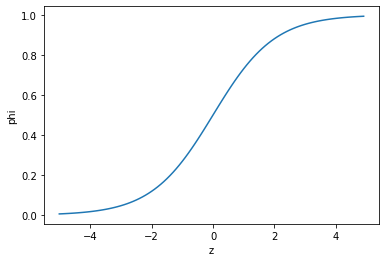

In [15]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)

phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)

plt.xlabel('z')

plt.ylabel('phi')

plt.show()

간단한 이진분류 문제 수행해보기 (도미와 빙어)

시그모이드 함수의 출력이 0.5보다 크면 양성 클래스
0.5보다 작으면 음성 클래스로 판단함 

In [16]:
#불리언 인덱싱 

char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


훈련 세트에서 도미와 빙어의 행만 골라내기

In [17]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

bream_smelt_indexes 배열은 도미와 빙어일 경우 True이고, 그 외는 모두 False 값이 들어가 있으므로 이 배열을 사용해 train_scaled와 train_target 배열에 불리언 인덱싱을 적용하면 손쉽게 도미와 빙어 데이터만 골라낼 수 있음 

In [18]:
#이 데이터로 로지스틱 회귀 모델을 훈련 
#LogisticRegression 클래스는 선형 모델이므로 sklearn.linear_model 패키지에 있음 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [19]:
#훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 예측해보아라 

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


두 번째 샘플을 제외하고 모두 도미로 예측 
KNeighborsClassifier와 마찬가지로 예측확률은 predict_proba()메서드를 제공, train_bream_smelt에서 처음 5개 샘플 예측 확률을 출력해보기 

In [20]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


샘플마다 2개의 확률이 출력됨, 
첫 번째 열이 음성클래스(0)에 대한 확률, 두 번째 열이 양성클래스(1)에 대한 확률이다. 

어떤 것이 양성 클래스냐면 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용한다. 


In [21]:
print(lr.classes_)

['Bream' 'Smelt']


따라서, 빙어(Smelt)가 양성클래스이다, predict_proba() 메서드가 반환한 배열 값을 보면 두 번째 샘플만 양성 클래스인 빙어의 확률이 높으므로 나머지는 모두 빙어(Bream)으로 예측


In [22]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


이 로지스틱 회귀 방정식이 학습한 방정식? 

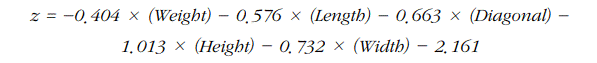

In [23]:
decisions= lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음 
파이썬의 사이파이 라이브러리에도 시그모이드 함수가 있고 
바로 expit()이다. np.exp()함수를 사용해 분수 계산을 하는 것보다 훨씬 편리하고 안전하다.

In [24]:
#decision 배열을 확률로 표현하기

from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


출력된 값을 보면 predict_proba()메서드 출력의 두 번째 열의 값과 동일합니다.
즉, decision_function()메서드는 양성 클래스에 대한 z값을 반환함 

결론: 이진 분류를 위해 2개의 생선 샘플을 골라냈고 로지스틱 회귀 모델을 훈련하였음 
이진 분류일 경우 predict_proba()메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력함 
decision_function()메서드는 양성 클래스에 대한 z값을 계산함 
coef_속성과 intercept_속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 들어있음 

##로지스틱 회귀로 다중 분류 수행하기 

In [25]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


훈련 세트와 테스트 세트에 대한 점수가 높고 과대적합이나 과소적합으로 치우친 것 같지 않아보임

In [26]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력 

In [27]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


=> 5개 샘플에 대한 예측이므로 5개의 행이 출력되었음 
7개의 생선에 대한 확률을 계산했으므로 7개의 열이 출력됨 
이진 분류일 경우 2개의 열만 있었을 것임

첫 번째 샘플을 보면 세 번째 열의 확률이 가장 높음 
84.1% 
세번째 열이 농어(Perch)에 대한 확률인지 classes_ 속성에서 클래스 정보를 확인할 수 있음 


In [28]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


첫 번째 샘플은 Perch를 가장 높은 확률로 예측하였음 
두 번째 샘플은 여섯 번째 열인 Smelt를 가장 높은 확률(94.6%)로 예측하였음 

다중 분류는 샘플마다 클래스 개수만큼 확률을 출력, 이 중 가장 높은 확률이 예측 클래스가 된다 

In [29]:
#다중 분류일 경우 선형 방정식은 어떤 모습이 될까요?

print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이 데이터는 5개의 특성을 사용하므로 coef_ 배열의 열은 5개이다.
하지만 행이 7개, intercept_도 7개나 있음 
-> 이진 분류에서 보았던 z를 7개나 계산 한다는 의미 

다중 분류는 클래스 마다 z값을 하나씩 계산한다 

가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다

확률은 이진분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환하였음 
다중 분류는 이와 달리 소프트맥수를 사용하여 7개의 z 값을 확률로 변환하였음 


In [30]:
# 이진 분류에서 처럼 decision_function() 메서드로 z1~z7까지의 값을 구한 다음 소프트맥스 함수를 사용해 확률로 바꾸기 
# 테스트 세트의 처음 5개 샘플에 대한 z1~z7의 값을 구해보기 


decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [31]:
#사이파이는 소프트맥스 함수도 제공하며 scipy.special 아래에 softmax()함수를 임포트해 사용

from scipy.special import softmax 
proba= softmax(decision, axis=1)
print(np. round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞서 구한 decision 배열을 softmax()함수에 전달함 
softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정 
axis=1로 지정하여 각 행, 각 샘플에 대해 소프트맥스를 계산함 

axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산함 

출력 결과를 앞서 구한 proba 배열과 비교하면 정확히 일치하기 떄문에 성공임을 알 수 있다. 

----

##확률적 경사하강법을 사용한 분류모델 
##SGD Classifier 



In [32]:
import pandas as pd 

#fish_csv_data 파일에서 판다스 데이터프레임을 만들어보기 
fish= pd.read_csv('https://bit.ly/fish_csv_data')

In [33]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [34]:
#Species 열을 제외한 나머지 5개는 입력 데이터로 사용함 
#Specoes 열은 타깃 데이터이다 

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [35]:
#사이킷런의 train_test_split()함수를 사용해 이 데이터를 훈련세트와 테스트 세트로 나눔 

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [36]:
#훈련 세트와 테스트 세트의 특성을 표준화 전처리함
#훈련세트에서 학습한 통계 값으로 테스트 세트도 변환해야함 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [37]:
#확률적 경사하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier 

from sklearn.linear_model import SGDClassifier

sc= SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [38]:
#확률적 경사하강법은 점진적 학습이 가능 
#모델 sc를 추가로 훈련이 가능하기에 모델을 이어서 훈련할 때는 partial_fit()을 사용 

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


=> 에포크를 한번 더 실행하여서 정확도가 향상됨을 확인할 수 있었음

In [39]:
from pandas.core.common import random_state
#partial_fit()메서드를 사용하여 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit()메서드에 전달해줌 
#이를 위햇 np.unique()함수로 train_target에 있는 7개의 생선의 목록을 만든다 
#에포크 마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비함 

import numpy as np 
sc= SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [40]:
#300번의 에포크 동안 훈련을 반복하여 진행
#반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_scroe 리스트에 추가함 

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

Text(0, 0.5, 'accuracy')

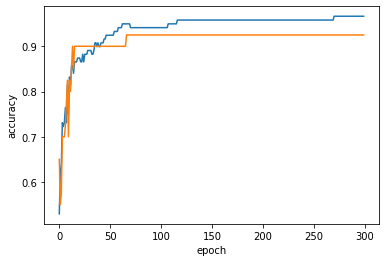

In [41]:
#300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려보기
import matplotlib.pyplot as plt 
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')

하늘색 - 훈련세트 그래프

주황색 - 테스트 세트 그래프

=> 에포크 초기에는 과소적합되어 훈련세트와 테스트 세트의 점수가 낮기에 이 경우 백 번째 에포크가 적절한 반복 횟수이다. 

In [42]:
#SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련 
#최종적으로 훈련으로 훈련세트와 테스트 세트에서 점수를 출력 


sc =SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


훈련 세트와 테스트 세트에서의 정확도 점수가 비교적 높게 나왔음 
확률적 경사 하강법을 사용한 생선 분류 문제도 성공적으로 수행 완료! 

In [44]:
## 힌지 손실을 사용해 같은 횟수 동안 모델을 훈련 

sc = SGDClassifier(loss='hinge', max_iter=100, tol= None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
